In [ ]:
import tensorflow 
from tensorflow.keras.datasets import imdb

In [ ]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [ ]:
test_data[0]


[1,
 591,
 202,
 14,
 31,
 6,
 717,
 10,
 10,
 2,
 2,
 5,
 4,
 360,
 7,
 4,
 177,
 5760,
 394,
 354,
 4,
 123,
 9,
 1035,
 1035,
 1035,
 10,
 10,
 13,
 92,
 124,
 89,
 488,
 7944,
 100,
 28,
 1668,
 14,
 31,
 23,
 27,
 7479,
 29,
 220,
 468,
 8,
 124,
 14,
 286,
 170,
 8,
 157,
 46,
 5,
 27,
 239,
 16,
 179,
 2,
 38,
 32,
 25,
 7944,
 451,
 202,
 14,
 6,
 717]

In [ ]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results


In [ ]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)


In [ ]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
from keras import losses
from keras import optimizers
from keras import metrics
# model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])
model.compile(optimizer=optimizers.RMSprop(lr=0.001),loss=losses.binary_crossentropy,metrics=[metrics.binary_accuracy])


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [ ]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]


In [ ]:
history = model.fit(partial_x_train,partial_y_train,epochs=20,batch_size=512,validation_data=(x_val, y_val),verbose=0)


In [ ]:
history_dict = history.history

In [ ]:
import pandas as pd
pd.DataFrame(history_dict)

,loss,binary_accuracy,val_loss,val_binary_accuracy
0,0.527781,0.772333,0.415182,0.8346
1,0.311758,0.899467,0.321323,0.8783
2,0.223139,0.928467,0.279786,0.8912
3,0.179077,0.938867,0.275390,0.8878
4,0.143247,0.954267,0.289417,0.8864
5,0.121676,0.961800,0.295847,0.8843
6,0.097795,0.972133,0.315709,0.8806
7,0.084947,0.972800,0.343975,0.8770
8,0.066504,0.982600,0.365501,0.8783
9,0.056468,0.985933,0.390965,0.8779


In [ ]:
 history_dict.keys()

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])

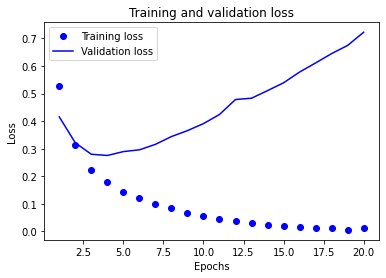

In [ ]:
import matplotlib.pyplot as plt

# history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

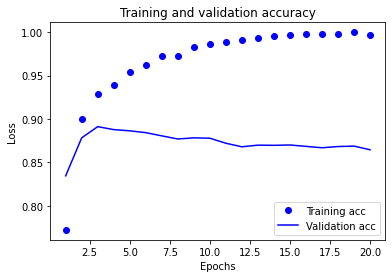

In [ ]:
acc_values = history_dict['binary_accuracy']
val_acc_values = history_dict['val_binary_accuracy']
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(x_train, y_train, epochs=3, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/3
49/49 [==============================] - 2s 29ms/step - loss: 0.4984 - accuracy: 0.8102
Epoch 2/3
49/49 [==============================] - 1s 28ms/step - loss: 0.2874 - accuracy: 0.9048
Epoch 3/3
782/782 [==============================] - 2s 2ms/step - loss: 0.3018 - accuracy: 0.8785


In [ ]:
results = model.evaluate(x_test, y_test)

782/782 [==============================] - 2s 2ms/step - loss: 0.3018 - accuracy: 0.8785
